The notebook explores following options

1.Under Sampling , Over Sampling

2.SMOTE , ADASYN

3.Setting class_weight parameter


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## metrics 
from sklearn.metrics import confusion_matrix , classification_report

### classifiers
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


In [0]:
df = pd.read_csv("/content/drive/My Drive/credit_card_dataset/creditcardfraud.zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
print("% of frauds happening " ,len(df.loc[df['Class']==1])/len(df))
print("no of frauds happening " ,len(df.loc[df['Class']==1]))

% of frauds happening  0.001727485630620034
no of frauds happening  492


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Time','Amount']] = scaler.fit_transform(df[['Time','Amount']])

Feature Engineering has been explored in different Notebook.

In [0]:

Y = df['Class']
df.drop('Class',inplace=True , axis =1)
X = df[df.columns]

Split it in test and train

In [0]:

from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, shuffle = True , random_state = 42)

In [0]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

All the techniques used are present in imblearn library. 

Random Undersampling of Majority Class

In [0]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)

X_under , Y_under = rus.fit_sample(X,Y)


In [0]:
X_under.shape , Y_under.shape

((984, 30), (984,))

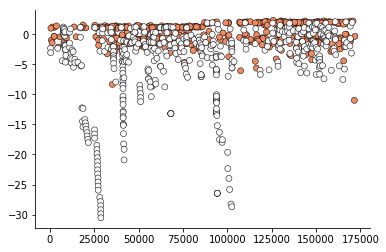

In [0]:
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in Y_under]
plt.scatter(X_under[:, 0], X_under[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()


*Random* *Oversampling* of Majority Class

In [0]:

from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state = 42)

X_over, Y_over = rus.fit_sample(X,Y)

In [0]:
X_over.shape , Y_over.shape

((568630, 30), (568630,))

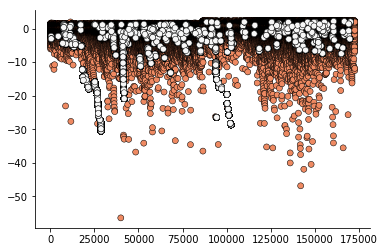

In [0]:
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in Y_over]
plt.scatter(X_over[:, 0], X_over[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()

Fiting Logistic Regression and Xgboost Classifier on Undersampled and Oversampled data.
X_under , Y_under : X and Y train data undersampled
X_over , Y_over : X and Y train data oversampled


In [0]:


from sklearn.linear_model import LogisticRegression

print(LogisticRegression())
params = {
    'C': [0.01,0.01,0.1,0.5,1],
    'penalty':['l1','l2']
}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid= params,
                    n_jobs = -1 , verbose = 1 , cv = 3 , scoring = 'f1' )

grid.fit(X_under,Y_under)
print(grid.best_params_)


In [0]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(C = 0.1 , penalty = 'l1')
clf_lr.fit(X_under , Y_under)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(Y_train,clf_lr.predict(X_train)))
print(classification_report(Y_train,clf_lr.predict(X_train)))

[[222342   5109]
 [    39    355]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.90      0.12       394

    accuracy                           0.98    227845
   macro avg       0.53      0.94      0.55    227845
weighted avg       1.00      0.98      0.99    227845



In [0]:
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,clf_lr.predict(X_test)))
print(classification_report(Y_test,clf_lr.predict(X_test)))

[[55590  1274]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [0]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


params = {
    'C': [0.01,0.01,0.1,0.5,1],
    'penalty':['l1','l2']
}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid= params,
                    n_jobs = -1 , verbose = 1 , cv = 3 , scoring = 'f1' )

grid.fit(X_over,Y_over)
print(grid.best_params_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 0.01, 'penalty': 'l2'}


In [0]:
clf_lr = LogisticRegression(C = 0.1 , penalty = 'l2')
clf_lr.fit(X_over , Y_over)

print("Train Classification Report")
from sklearn.metrics import classification_report
print(confusion_matrix(Y_train,clf_lr.predict(X_train)))
print(classification_report(Y_train,clf_lr.predict(X_train)))   ### original train dataset

print("Test Classification Report ")
print(confusion_matrix(Y_test,clf_lr.predict(X_test)))
print(classification_report(Y_test,clf_lr.predict(X_test)))     ### test dataset reserved 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Classification Report
[[222426   5025]
 [    33    361]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.07      0.92      0.12       394

    accuracy                           0.98    227845
   macro avg       0.53      0.95      0.56    227845
weighted avg       1.00      0.98      0.99    227845

Test Classification Report 
[[55625  1239]
 [    7    91]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [0]:



params = {
    'n_estimators': [10,20,50,100,200], 
    'gamma' : [0.01,0.1,0.5,1]  ,
    'max_depth' : [3,5,7,9]
    #'min_child_weight': , 
    #'scale_pos_weight' : 
}

grid = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid= params,
                    n_jobs = -1 , verbose = 1 , cv = 3 , scoring = 'f1' )

grid.fit(X_under,Y_under)
print(grid.best_params_)


Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.0s


{'gamma': 0.01, 'max_depth': 5, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   30.1s finished


In [0]:

clf_xg = xgb.XGBClassifier(max_depth = 5, n_estimators = 10 , gamma = 0.01 )

clf_xg.fit(X_under , Y_under)

print("Train Classification Report")
from sklearn.metrics import classification_report
print(confusion_matrix(Y_train,clf_xg.predict(X_train.values)))
print(classification_report(Y_train,clf_xg.predict(X_train.values)))   ### original train dataset

print("Test Classification Report ")
print(confusion_matrix(Y_test,clf_xg.predict(X_test.values)))
print(classification_report(Y_test,clf_xg.predict(X_test.values)))     ### test dataset reserved 


Train Classification Report
[[217442  10009]
 [    17    377]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    227451
           1       0.04      0.96      0.07       394

    accuracy                           0.96    227845
   macro avg       0.52      0.96      0.52    227845
weighted avg       1.00      0.96      0.98    227845

Test Classification Report 
[[54389  2475]
 [    5    93]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.95      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.52     56962
weighted avg       1.00      0.96      0.98     56962



SMOTE and ADASYN on train dataset

In [0]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_smote , Y_smote = sm.fit_sample(X_train,Y_train)



In [0]:
X_smote.shape , Y_smote.shape

((454902, 30), (454902,))

In [0]:
### Logistic Regression 
params = {
    'C': [0.01,0.01,0.1,0.5,1],
    'penalty':['l1','l2']
}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid= params,
                    n_jobs = -1 , verbose = 1 , cv = 3 , scoring = 'f1' )

grid.fit(X_smote,Y_smote)
print(grid.best_params_)

In [0]:
clf_lr = LogisticRegression(C = 1 , penalty = 'l1')
clf_lr.fit(X_smote , Y_smote)

print("Train Classification Report")
from sklearn.metrics import classification_report
print(confusion_matrix(Y_train,clf_lr.predict(X_train)))
print(classification_report(Y_train,clf_lr.predict(X_train)))   ### original train dataset

print("Test Classification Report ")
print(confusion_matrix(Y_test,clf_lr.predict(X_test)))
print(classification_report(Y_test,clf_lr.predict(X_test)))     ### test dataset reserved 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Classification Report
[[221865   5586]
 [    31    363]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.92      0.11       394

    accuracy                           0.98    227845
   macro avg       0.53      0.95      0.55    227845
weighted avg       1.00      0.98      0.99    227845

Test Classification Report 
[[55441  1423]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [0]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 0)  ###  ratio and techniques take default value
X_adasyn , Y_adasyn = adasyn.fit_sample(X_train,Y_train)


In [0]:
### fitting a logistic regression after grid search
params = {
    'C': [0.01,0.01,0.1,0.5,1],
    'penalty':['l1','l2']
}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid= params,
                    n_jobs = -1 , verbose = 1 , cv = 3 , scoring = 'f1' )

grid.fit(X_adasyn,Y_adasyn)
print(grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 1, 'penalty': 'l1'}


In [0]:
clf_lr = LogisticRegression(C = 1 , penalty = 'l1')
clf_lr.fit(X_adasyn , Y_adasyn)

print("Train Classification Report")
from sklearn.metrics import classification_report
print(confusion_matrix(Y_train,clf_lr.predict(X_train)))
print(classification_report(Y_train,clf_lr.predict(X_train)))   ### original train dataset

print("Test Classification Report ")
print(confusion_matrix(Y_test,clf_lr.predict(X_test)))
print(classification_report(Y_test,clf_lr.predict(X_test)))     ### test dataset reserved 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Classification Report
[[207347  20104]
 [    16    378]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    227451
           1       0.02      0.96      0.04       394

    accuracy                           0.91    227845
   macro avg       0.51      0.94      0.49    227845
weighted avg       1.00      0.91      0.95    227845

Test Classification Report 
[[51733  5131]
 [    6    92]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.94      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [0]:


params = {
    'n_estimators': [10,20,50,100,200], 
    'gamma' : [0.01,0.1,0.5,1]  ,
    'max_depth' : [3,5,7,9]
    #'min_child_weight': , 
    #'scale_pos_weight' : 
}

grid = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid= params,
                    n_jobs = -1 , verbose = 1 , cv = 3 , scoring = 'f1' )

grid.fit(X_adasyn,Y_adasyn)
print(grid.best_params_)

In [19]:

clf_xg = xgb.XGBClassifier(max_depth = 5, n_estimators = 100 , gamma = 0 )

clf_xg.fit(X_adasyn, Y_adasyn)

print("Train Classification Report")
from sklearn.metrics import classification_report
print(confusion_matrix(Y_train,clf_xg.predict(X_train.values)))
print(classification_report(Y_train,clf_xg.predict(X_train.values)))   ### original train dataset

print("Test Classification Report ")
print(confusion_matrix(Y_test,clf_xg.predict(X_test.values)))
print(classification_report(Y_test,clf_xg.predict(X_test.values)))     ### test dataset reserved 

Train Classification Report
[[225630   1821]
 [     0    394]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.18      1.00      0.30       394

    accuracy                           0.99    227845
   macro avg       0.59      1.00      0.65    227845
weighted avg       1.00      0.99      0.99    227845

Test Classification Report 
[[56390   474]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.91      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.95      0.63     56962
weighted avg       1.00      0.99      0.99     56962



1.using class_weights parameter : 'balanced' 

2.OR specify a float  - no_of_positive_class/no_of_negative_class 

3.if the number is too big take sqrt and use that value (to avoid too large value associated with one record of one class).

In [20]:

clf_lr = LogisticRegression(class_weight='balanced',penalty = 'l2',C = 0.01)
clf_lr.fit(X_train,Y_train)


print("Train Classification Report")
from sklearn.metrics import classification_report
print(confusion_matrix(Y_train,clf_lr.predict(X_train.values)))
print(classification_report(Y_train,clf_lr.predict(X_train.values)))   ### original train dataset

print("Test Classification Report ")
print(confusion_matrix(Y_test,clf_lr.predict(X_test.values)))
print(classification_report(Y_test,clf_lr.predict(X_test.values)))     ### test dataset reserved 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Classification Report
[[222331   5120]
 [    33    361]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.07      0.92      0.12       394

    accuracy                           0.98    227845
   macro avg       0.53      0.95      0.56    227845
weighted avg       1.00      0.98      0.99    227845

Test Classification Report 
[[55577  1287]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [22]:
clf_xg = xgb.XGBClassifier(max_depth = 5, n_estimators = 10 , gamma = 0 , class_weight = 'balanced')

clf_xg.fit(X_train, Y_train)

print("Train Classification Report")
from sklearn.metrics import classification_report
print(confusion_matrix(Y_train,clf_xg.predict(X_train)))
print(classification_report(Y_train,clf_xg.predict(X_train)))   ### original train dataset

print("Test Classification Report ")
print(confusion_matrix(Y_test,clf_xg.predict(X_test)))
print(classification_report(Y_test,clf_xg.predict(X_test)))     ### test dataset reserved 

Train Classification Report
[[227434     17]
 [    69    325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.95      0.82      0.88       394

    accuracy                           1.00    227845
   macro avg       0.97      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845

Test Classification Report 
[[56859     5]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

